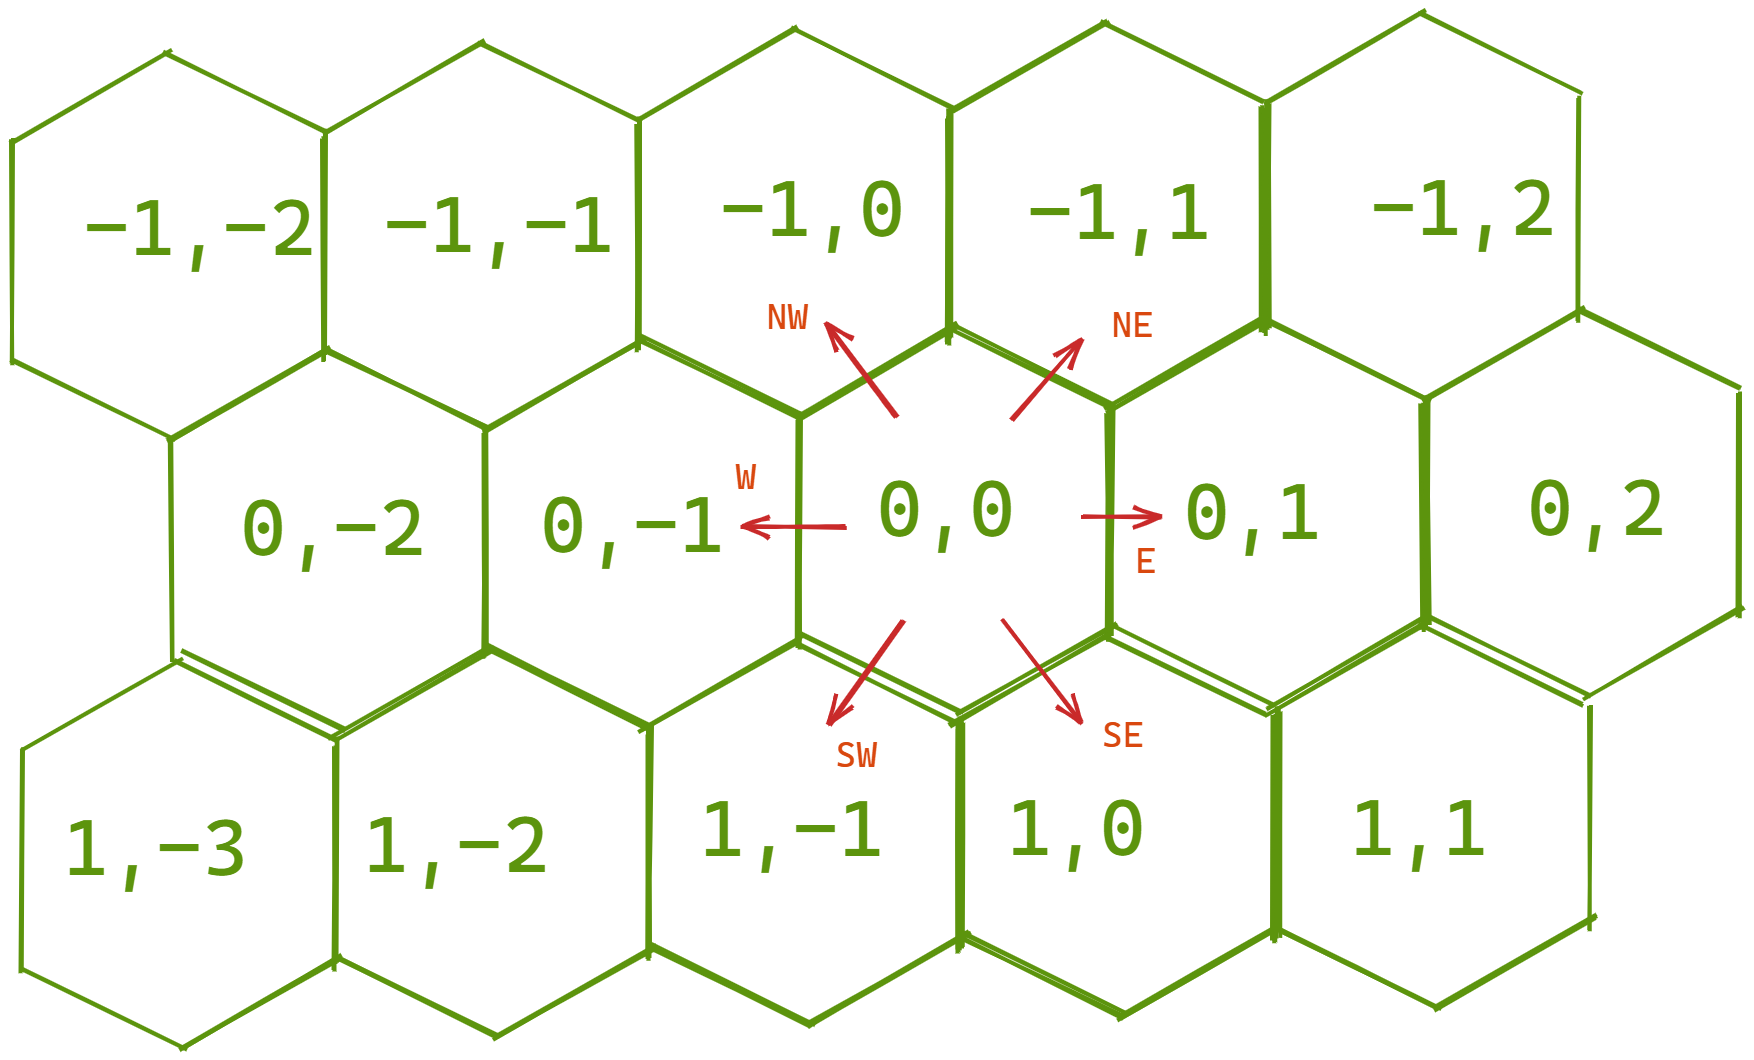

In [123]:
import numpy as np
def split_cmd(cmd):
    arr=[]
    i=0;
    while i<len(cmd):
        if cmd[i]=='n' or cmd[i]=='s':
            arr.append(cmd[i:i+2])
            i+=2;
        else:
            arr.append(cmd[i])
            i+=1;
    return arr

decoder={
        "nw": ( -1, 0),
        "ne": ( -1, 1),
         "e": (  0, 1),
        "se": (  1, 0),
        "sw": (  1,-1),
         "w": (  0,-1),
    }
def calc_step(cmd):
  
    return np.array(decoder[cmd])

def get_coord(cmd_str):
    cmd_arr  = split_cmd(cmd_str)
    coord = np.array([0,0])
    for x in cmd_arr:
        coord += calc_step(x)
    return coord

a0 = get_coord('nwwswee')
a1 = get_coord('esew')
print(f"{a0} {a1}")

filename = "input.txt"
with open(filename) as f:
    content = f.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
content = [x.strip() for x in content] 

floor={}
for cmd in content:
    key = tuple(get_coord(cmd));
    if key in floor:
        floor[key] = (floor[key] + 1)%2
    else:
        floor[key] = 1
def drop_zeros(floor):
    return {k: v for k, v in floor.items() if v != 0}
floor = drop_zeros(floor);
s = get_sum(floor)
print(f"Ans 1 : {s}")


n_days = 100;
P=0
for day in range(0,n_days):
    if P:
        print(f"===DAY{day+1:3}===")
    neighb_to_black = []
    blacks_to_white = []
    for x in floor:
        n_active_around = 0;
        for d in decoder.values():
            c = (x[0]+d[0],
                 x[1]+d[1])
            if c in floor:
                n_active_around+=1;
            else:
                neighb_to_black.append(c)
        if n_active_around == 0 or n_active_around>2:
            blacks_to_white.append(x)
    if P:
        print(f"Turn Off  : {len(blacks_to_white)}")
    
    whites_to_black = []
    for x in neighb_to_black: #Iterate values around blacks
        if x not in floor: # Ignore neighbors that are black itself, only whites
            n_black_around = 0;
            for d in decoder.values():
                c = (x[0]+d[0],x[1]+d[1])
                if c in floor:
                    n_black_around +=1;
            if (n_black_around == 2):
                whites_to_black.append(x)
    if P: 
        print(f"Light up : {len(whites_to_black)}")
    
    # Light up!
    for x in whites_to_black:
        floor[x] = 1;
    # Turn Down
    for x in blacks_to_white:
        floor[x] = 0;
    floor = drop_zeros(floor);
    
    s = get_sum(floor)
    if P:
        print(f"Blacks {s}")
s = get_sum(floor)
print(f"Ans 2 : {s}")


[0 0] [1 0]
Ans 1 : 497
Ans 2 : 4156
